In [3]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
path='D:/Project Data/Happy_Customer_Bank/'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import math

In [4]:
train=pd.read_csv(path+'Train_nyOWmfK.csv',encoding='iso-8859-1')
testdata=pd.read_csv(path+'Test_bCtAN1w.csv',encoding='iso-8859-1')
train.ix[train['Gender']=='Female','Gender_']=1
train.ix[train['Gender']=='Male','Gender_']=0
train.ix[train['Mobile_Verified']=='N','Mobile_Verified_']=0
train.ix[train['Mobile_Verified']=='Y','Mobile_Verified_']=1
train.ix[train['Filled_Form']=='Y','Filled_Form_']=1
train.ix[train['Filled_Form']=='N','Filled_Form_']=0
train.ix[train['Device_Type']=='Mobile','Device_Type_']=0
train.ix[train['Device_Type']=='Web-browser','Device_Type_']=1

train['age']=[(2015-(1900+int(i[-2:]))) for i in train['DOB'].values]  

train['Loan_Amount_Applied']=train['Loan_Amount_Applied'].fillna(train['Loan_Amount_Applied'].mean())

train['Loan_Tenure_Applied']=train['Loan_Tenure_Applied'].fillna(train['Loan_Tenure_Applied'].median())

train['Existing_EMI']=train['Existing_EMI'].fillna(0)

train['Loan_Amount_Submitted']=train['Loan_Amount_Submitted'].fillna(train['Loan_Amount_Submitted'].mean())

train['Loan_Tenure_Submitted']=train['Loan_Tenure_Submitted'].fillna(train['Loan_Tenure_Submitted'].median())

train['Interest_Rate']=train['Interest_Rate'].fillna(train['Interest_Rate'].median())

train['Processing_Fee']=train['Processing_Fee'].fillna(train['Processing_Fee'].mean())

train['EMI_Loan_Submitted']=train['EMI_Loan_Submitted'].fillna(train['EMI_Loan_Submitted'].mean())

In [ ]:
for i in 

444554443

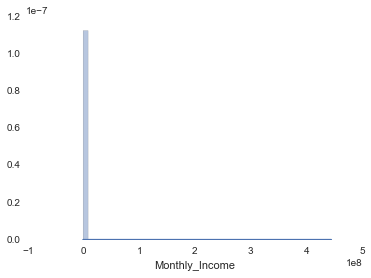

In [5]:
sns.distplot(train['Monthly_Income'])
max(train['Monthly_Income'])

In [6]:
Loan_Amount_Applied_mean=train['Loan_Amount_Applied'].mean()

Loan_Tenure_Applied_median=train['Loan_Tenure_Applied'].median()

Loan_Amount_Submitted_mean=train['Loan_Amount_Submitted'].mean()

Loan_Tenure_Submitted_median=train['Loan_Tenure_Submitted'].median()

Interest_Rate_median=train['Interest_Rate'].median()

Processing_Fee_mean=train['Processing_Fee'].mean()

EMI_Loan_Submitted_mean=train['EMI_Loan_Submitted'].mean()

In [7]:
train=train[train['age'] < 60]
#train=train[train['Interest_Rate'] < 30]
#train=train[train['Loan_Amount_Applied'] < 300000]
train=train[train['Monthly_Income'] < 600000]

In [8]:
train.corr()['Disbursed'].order(ascending=False)

Disbursed                1.000000
LoggedIn                 0.683175
Var5                     0.117448
Monthly_Income           0.070370
Existing_EMI             0.069120
Mobile_Verified_         0.044346
Loan_Amount_Submitted    0.039312
age                      0.039029
Filled_Form_             0.036973
Var4                     0.036830
Loan_Tenure_Applied      0.036793
EMI_Loan_Submitted       0.033767
Loan_Amount_Applied      0.032255
Processing_Fee           0.022651
Device_Type_             0.014688
Loan_Tenure_Submitted   -0.005005
Gender_                 -0.043890
Interest_Rate           -0.055434
Name: Disbursed, dtype: float64

In [9]:
Cat_Var=['Var4','Source','Var2','Var1']
Num_Var=['Monthly_Income',
    #'Loan_Amount_Applied',
    #'Existing_EMI',
    'Var5','Loan_Amount_Submitted',
    #'Loan_Tenure_Submitted',
       # 'Interest_Rate',
    #'Processing_Fee',
    'EMI_Loan_Submitted']
Processed_Var=[#'Gender_',
    'Mobile_Verified_','Filled_Form_',
    #'Device_Type_',
    'age']

Target_log=['LoggedIn']
Target=['Disbursed']

In [10]:
Num_Var_log=Num_Var +['LoggedIn']

In [11]:
cat_column=['Var4']
cat_data=train['Var4'].tolist() +testdata['Var4'].tolist()
data_=train[cat_column]
le = preprocessing.LabelEncoder()
le.fit(cat_data)
newcol=le.transform(data_)
enc = OneHotEncoder(sparse=False)
enc.fit(newcol)
print(enc.n_values_)
print(enc.feature_indices_)
dummy_var4=enc.transform(newcol)

cat_column=['Source']
cat_data=train['Source'].tolist() +testdata['Source'].tolist()
data_=train[cat_column]
le1 = preprocessing.LabelEncoder()
le1.fit(cat_data)
newcol=le1.transform(data_)
enc1 = OneHotEncoder(sparse=False)
enc1.fit(newcol)
print(enc1.n_values_)
print(enc1.feature_indices_)
dummy_Source=enc1.transform(newcol)


cat_column=['Var2']
cat_data=train['Var2'].tolist() +testdata['Var2'].tolist()
data_=train[cat_column]
le2 = preprocessing.LabelEncoder()
le2.fit(cat_data)
newcol=le2.transform(data_)
enc2 = OneHotEncoder(sparse=False)
enc2.fit(newcol)
print(enc2.n_values_)
print(enc2.feature_indices_)
dummy_var2=enc2.transform(newcol)

cat_column=['Var1']
cat_data=train['Var1'].tolist() +testdata['Var1'].tolist()
data_=train[cat_column]
le3 = preprocessing.LabelEncoder()
le3.fit(cat_data)
newcol=le3.transform(data_)
enc3 = OneHotEncoder(sparse=False)
enc3.fit(newcol)
print(enc3.n_values_)
print(enc3.feature_indices_)
dummy_var1=enc3.transform(newcol)

[8]
[0 8]
[34]
[ 0 34]
[7]
[0 7]
[19]
[ 0 19]


In [12]:
dummy=np.hstack((dummy_var4,dummy_Source,dummy_var2,dummy_var1))

In [13]:
dummy.shape

(86527, 64)

In [14]:
Num_variable=Num_Var+Processed_Var

In [15]:
train_num=train[Num_variable].as_matrix()
traindata=np.hstack((train_num,dummy))
traindata.shape

(86527, 71)

In [16]:
train_1, test_1,target_train_1, target_test_1 =train_test_split(traindata,train[Target_log],
                                                                        test_size=.33,random_state=42)
train_1.shape, test_1.shape,target_train_1.shape, target_test_1.shape

((57973, 71), (28554, 71), (57973, 1), (28554, 1))

In [123]:
from sklearn.cross_validation import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(train[Target_log], 2, test_size=.99, random_state=0)
for train_index, test_index in sss:
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_s, X_test_s = traindata[train_index], traindata[test_index]
    y_train_s, y_test_s = train[Target_log].values[train_index], train[Target_log].values[test_index]

In [124]:
X_train.shape

(865, 71)

In [125]:
np.unique([i[0]for i in y_train],return_counts=True)

(array([0, 1], dtype=int64), array([840,  25], dtype=int64))